<a href="https://colab.research.google.com/github/hasanulkarim/kaggle---house-price-prediction/blob/master/house_price_predict_v1_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

! git clone https://github.com/hasanulkarim/kaggle---house-price-prediction.git

fatal: destination path 'kaggle---house-price-prediction' already exists and is not an empty directory.


In [0]:
!ls

data_description.txt		 sample_submission.csv	train.csv
kaggle---house-price-prediction  test.csv


In [0]:
cd kaggle---house-price-prediction/

/content/kaggle---house-price-prediction/kaggle---house-price-prediction


In [0]:
#!ls

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


**put train_X and test set together for ease of operation for the next few steps** 

In [0]:
train_test = [train,test]

train_test = [dataset.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis =1) for dataset in train_test]


In [0]:
#split out numerical and categorical columns into two for test and train_X table to apply one hot and imputer easily through pipeline
num_attribs = list(test._get_numeric_data()) 
num_attribs = num_attribs[1:]

len(num_attribs)

36

In [0]:
#categorical attributes

cat_attribs = list(train_test[1].select_dtypes(include='object')) #Doesnt really mater if you use train_test[0] instead
len(cat_attribs)


38

In [0]:
train_cat_cats = [train_test[0][cat_attribs][i].value_counts() for i in cat_attribs]


In [0]:
test_cat_cats = [train_test[1][cat_attribs][i].value_counts() for i in cat_attribs]

In [0]:
z = [] # empty list, we will append all categorical columns where number of category is 
        #not equal between test and train
for i in range(38):
  y = len(train_cat_cats[i]) == len(test_cat_cats[i])
  if y == False:
    print(i,y,train_cat_cats[i].name)
    z.append(train_cat_cats[i].name)

4 False Utilities
9 False Condition2
11 False HouseStyle
13 False RoofMatl
14 False Exterior1st
15 False Exterior2nd
25 False Heating
28 False Electrical
33 False GarageQual


In [0]:
train_test = [dataset.drop(z, axis =1) for dataset in train_test]

In [0]:
#sanity check

train.shape, test.shape, train_test[0].shape, train_test[1].shape

((1460, 81), (1459, 80), (1460, 67), (1459, 66))

In [0]:
#repeat and reassign the shorte cat list after dropping the mismatched columns
cat_attribs = list(train_test[1].select_dtypes(include='object')) #Doesnt really mater if you use train_test[0] instead
len(cat_attribs)

29

In [0]:
train_test[0][cat_attribs].isna().sum().sort_values(ascending = False)

GarageCond       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
BldgType          0
Condition1        0
Neighborhood      0
LandSlope         0
LotConfig         0
LandContour       0
LotShape          0
Street            0
RoofStyle         0
SaleCondition     0
ExterQual         0
ExterCond         0
Foundation        0
SaleType          0
HeatingQC         0
CentralAir        0
KitchenQual       0
Functional        0
PavedDrive        0
MSZoning          0
dtype: int64

In [0]:
train_test[0][cat_attribs].head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,RoofStyle,...,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,Gable,...,Ex,Y,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,Gable,...,Ex,Y,TA,Typ,Attchd,RFn,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,Gable,...,Ex,Y,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,Gable,...,Gd,Y,Gd,Typ,Detchd,Unf,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,Gable,...,Ex,Y,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal


In [0]:
test_with_Id = train_test[1]
test_with_Id.shape

(1459, 66)

In [0]:
train_test[0].shape, train_test[1].shape

((1460, 67), (1459, 66))

In [0]:
train_test = [dataset.drop(['Id'], axis = 1) for dataset in train_test]

#This is important - quickly define numerical and categorical pipeline for numerical data and categorical data operations

In [0]:
#defining simpleimputer for numerical missing values and onehot encoder for categorical values

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('cat_onehot', OneHotEncoder(sparse = False),)
])

#Use columnTransformer to execute full pipeline at once on the datasets, use list comprehension to perform it on both train and test set

In [0]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
],remainder='passthrough')

train_test_prepared = [full_pipeline.fit_transform(dataset) for dataset in train_test]

In [0]:
train_test_prepared[0].shape, train_test_prepared[1].shape

((1460, 198), (1459, 197))

In [0]:
len(full_pipeline.transformers_[0][2]), len(full_pipeline.transformers_[1][2])

(36, 29)

In [0]:
len(full_pipeline.transformers_[1][1].named_steps['cat_onehot'].get_feature_names())

161

In [0]:
#perform stratified K fold split

from sklearn.model_selection import StratifiedKFold

X = train_test_prepared[0][:,:197]
#X = X.toarray()
y = train_test_prepared[0][:,197]

skf = StratifiedKFold(n_splits=2, random_state=2, shuffle=False)

for train_index, val_index in skf.split(X, y):
  #print("TRAIN:", train_index, "val:", val_index)
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


#Building a dense neural network

In [0]:
#Let's build a very simple denese sequential network using keras
import tensorflow as tf
from keras.models import Sequential
#from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers

# model = Sequential([
#     Dense(10, activation ='relu', input_shape =(10,)),
#     Dense(10, activation = 'relu'),
#     Dense(10, activation = 'relu'),
#     Dense(10, activation = 'relu'),
#     Dense(1)
# ])

def build_model():
  model = keras.Sequential([
      layers.Dense(1000, activation = tf.nn.relu, input_shape =(197,)),
      layers.Dense(1000, activation = tf.nn.relu),
      layers.Dense(1000, activation = tf.nn.relu),
      layers.Dense(500, activation = tf.nn.relu),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss = 'mse',
               optimizer = optimizer,
               metrics =['mae', 'mse'])
  return model

In [0]:
def build_model_with_dropout():
  model_dropout = keras.Sequential([
      layers.Dense(1000, activation = tf.nn.relu, input_shape =(197,)),
      layers.Dropout(0.3),
      layers.Dense(1000, activation = tf.nn.relu),
      layers.Dropout(0.3),
      layers.Dense(1000, activation = tf.nn.relu),
      layers.Dropout(0.3),
      layers.Dense(500, activation = tf.nn.relu),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model_dropout.compile(loss = 'mse',
               optimizer = optimizer,
               metrics =['mae', 'mse'])
  return model_dropout

In [0]:
#model with regularization
from keras import regularizers

def build_model_reg_drop():
  model_reg_drop = keras.Sequential([
      layers.Dense(1000, activation = tf.nn.relu, 
                   kernel_regularizer = regularizers.l2(0.01), input_shape =(197,)),
      layers.Dropout(0.3),
      layers.Dense(1000, activation = tf.nn.relu,
                  kernel_regularizer = regularizers.l2(0.01)),
      layers.Dropout(0.3),
      layers.Dense(1000, activation = tf.nn.relu,
                  kernel_regularizer = regularizers.l2(0.01)),
      layers.Dropout(0.3),
      layers.Dense(1000, activation = tf.nn.relu,
                  kernel_regularizer = regularizers.l2(0.01)),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model_reg_drop.compile(loss = 'mse',
               optimizer = optimizer,
               metrics =['mae', 'mse'])
  return model_reg_drop

In [0]:
model = build_model()

In [0]:
#to run with the dropout
model_dropout = build_model_with_dropout()

In [0]:
#to run with l2 reg and dropout
model_reg_drop = build_model_reg_drop()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1000)              198000    
_________________________________________________________________
dense_56 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_57 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_58 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 501       
Total params: 2,701,001
Trainable params: 2,701,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1000)              198000    
_________________________________________________________________
dropout_24 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_26 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 500)               500500    
__________

In [0]:
model_reg_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 1000)              198000    
_________________________________________________________________
dropout_30 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_32 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 1000)              1001000   
__________

In [0]:
from timeit import default_timer as timer

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 ==0: print('')
    print('.', end='')

start = timer()

history_reg_drop = model_reg_drop.fit(X_train,y_train,
                batch_size=12, epochs =100, verbose =0,
                validation_data=(X_val,y_val),
                callbacks = [PrintDot()])

end = timer()

model_reg_drop_time = end - start
print('model_time = ',  model_reg_drop_time)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................model_time =  171.54485083799955


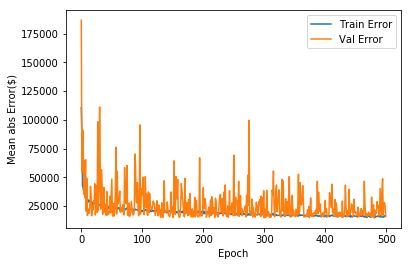

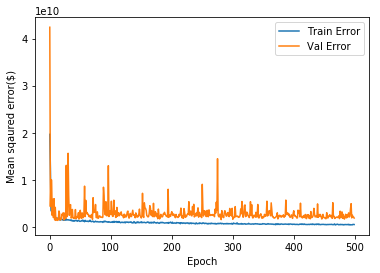

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean abs Error($)')
  
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
          label ='Train Error')
  
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
          label = 'Val Error')
  
  plt.legend()
  #plt.ylim([0,5])
  
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean sqaured error($)')
  
  plt.plot(hist['epoch'], hist['mean_squared_error'],
          label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
          label = 'Val Error')
  
  plt.legend()
  
plot_history(history_dropout)  

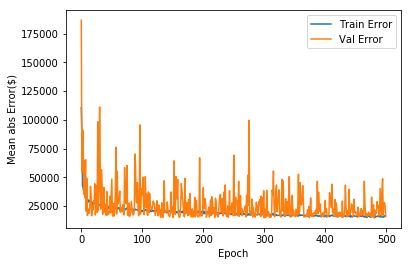

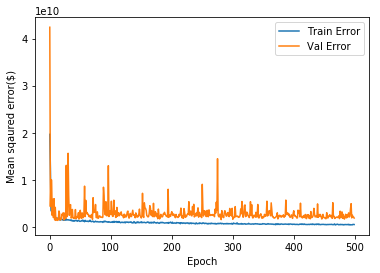

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  """plots the MAE and MSE per epoch, uncomment the lines to play with x and y limits if needed"""
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  #plt.title('With droput(0.3)')
  plt.xlabel('Epoch')
  plt.ylabel('Mean abs Error($)')
  
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
          label ='Train Error')
  
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
          label = 'Val Error')
  
  plt.legend()
  #plt.xlim([0,70])
  #plt.ylim([0,5])
  
  
  plt.figure()
  #plt.title('with dropout(0.3)')
  plt.xlabel('Epoch')
  plt.ylabel('Mean sqaured error($)')
  
  plt.plot(hist['epoch'], hist['mean_squared_error'],
          label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
          label = 'Val Error')
  
  plt.legend()
  #plt.xlim([0,70])
  #plt.ylim([0,2])
  
plot_history(history_dropout)  

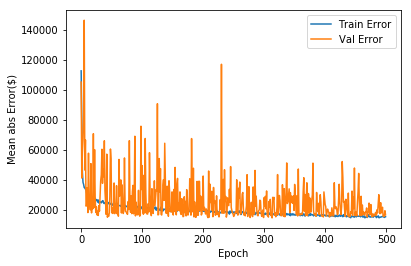

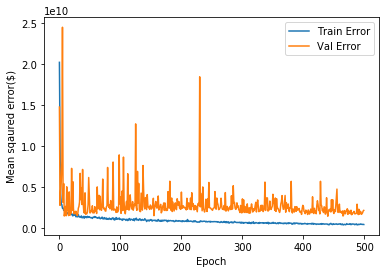

In [0]:
plot_history(history_reg_drop)  


.....................

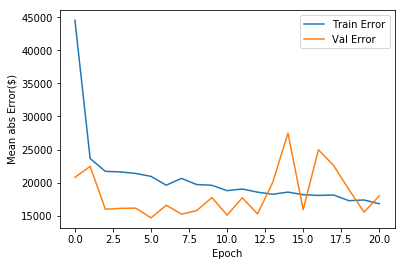

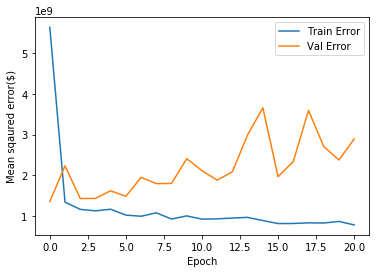

In [0]:
#lets do early stopping now and see how it goes
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',  patience = 20)


history_reg_drop_early = model_reg_drop.fit(X_train,y_train,
                batch_size=12, epochs =500, verbose =0,
                validation_data=(X_val,y_val), callbacks = [early_stop, PrintDot()])

plot_history(history_reg_drop_early)

In [0]:
#time to predict
X_test = train_test_prepared[1]

test_predictions = model_reg_drop.predict(X_test)

test_predictions = test_predictions.reshape(len(test_predictions),)

In [0]:
preds = pd.DataFrame({
    "Id":test_with_Id['Id'],
    'SalePrice':test_predictions})

In [0]:
preds.head()

,Id,SalePrice
0,1461,125464.703125
1,1462,165724.312500
2,1463,195608.671875
3,1464,209495.765625
4,1465,208414.265625


In [0]:
preds.to_csv('submission_house_price_DNN.csv', index = False)

In [0]:
final = pd.read_csv('submission_house_price_DNN.csv')

In [0]:
!ls #check if the file is saved and ready to submit

data_description.txt   submission_house_price_DNN.csv  train.csv
sample_submission.csv  test.csv
